In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
data = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Observation:
Average age of customers is about 39 years with maximum age of 64 years and they have one child on an average with minimum of no child and maximum of 5 children.
75% of observations show 51 years of age and 2 children.


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There is no null value

In [11]:
# Check for missing values
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


There is no null value

Text(0.5, 1.0, 'Distribution of charges values :')

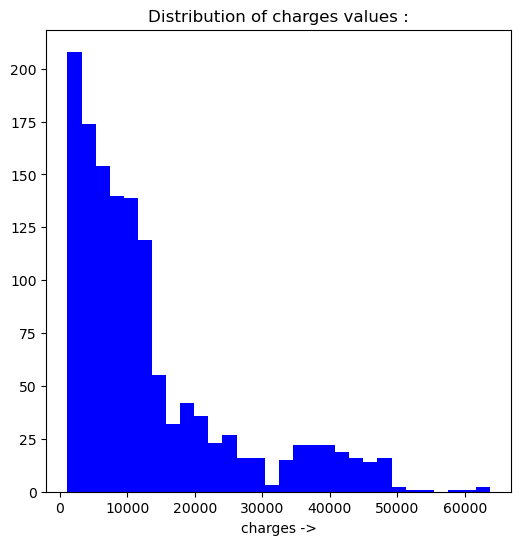

In [23]:
#Data visulatation

plt.figure(figsize=(6,6))
plt.hist(data.charges, bins = 'auto', color = 'blue')
plt.xlabel("charges ->")
plt.title("Distribution of charges values :")

Observation:
1.Most beneficiaries are charged between 1000 to 10000 units.   
2.Very few are charged above 50000.


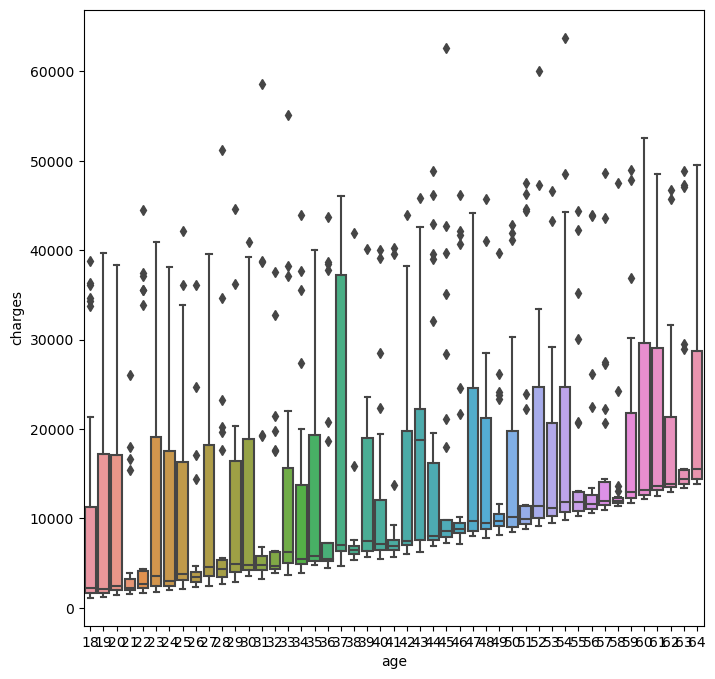

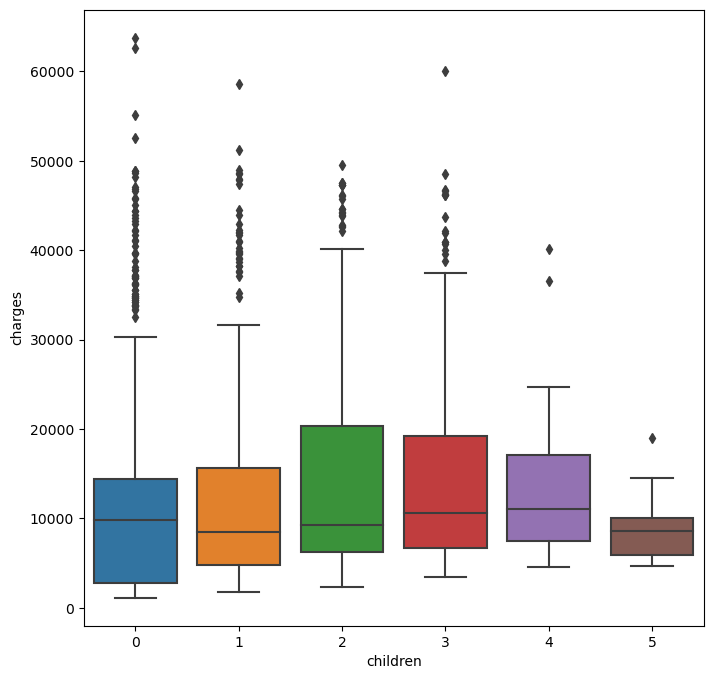

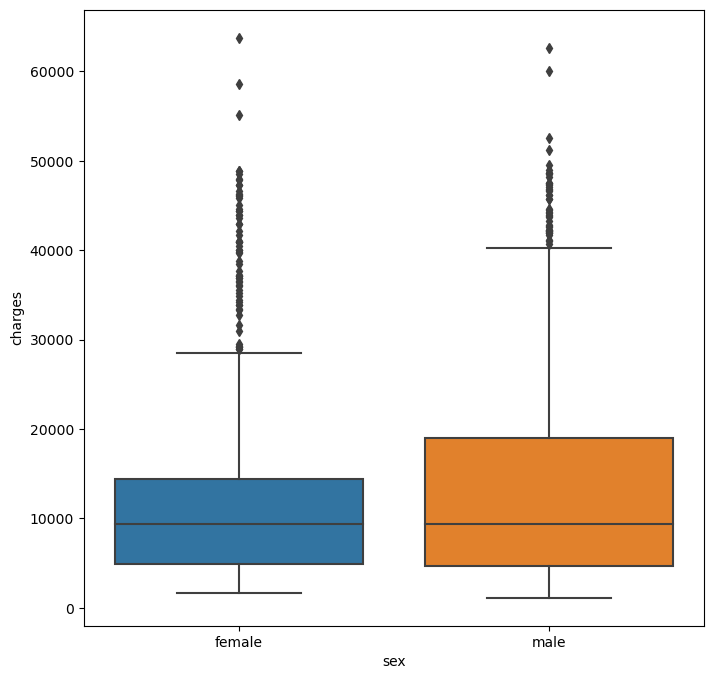

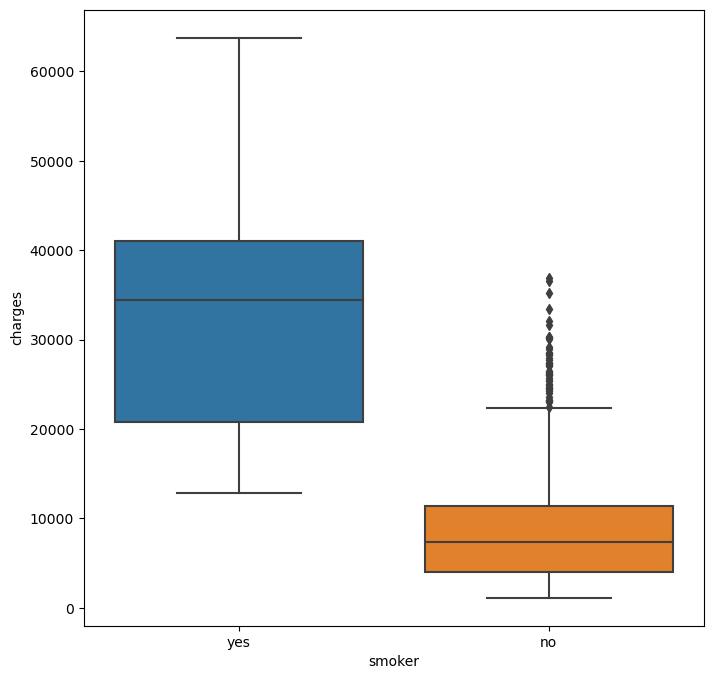

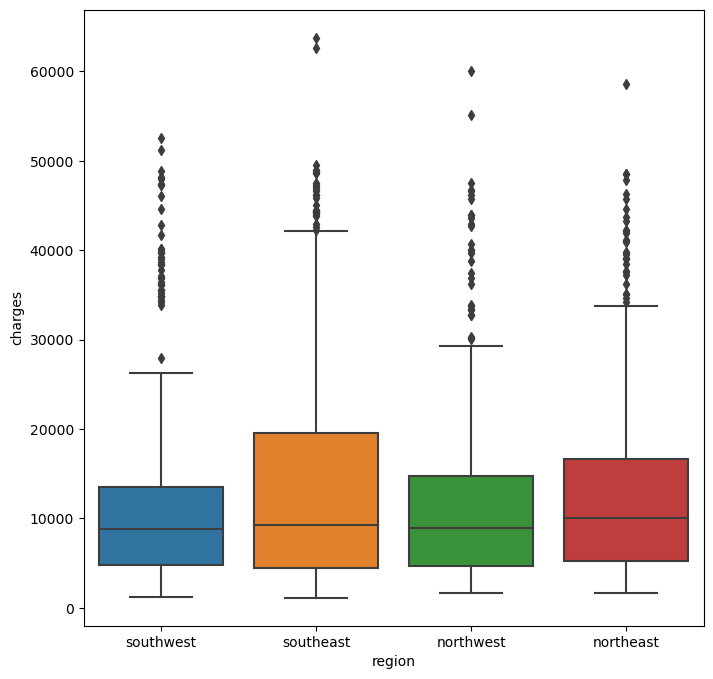

In [14]:
#check for outliers and relation of each feature with 'charges'
cols = ['age', 'children', 'sex', 'smoker', 'region']
for col in cols:
    plt.figure(figsize=(8,8))
    sns.boxplot(x = data[col], y = data['charges'])

Observation:

As age increases, insurance cost increases. The plots show an increasing trend in charges starting from around 1000 for age 18-19 to about 10000 or so for customers with age near 60 


Customers with 2 children are charged highest when compared to others. Those with 5 or more children are charged less.This may be due to dominance of group with 2 or 3 children in the entire population.

The plot shows a clear distribution pattern of high charges for beneficiaries who are smokers and considerably low costs for non smoker
    
    

In [21]:
# Create Correlation matrix for all features of data.
data.corr()

,age,sex,bmi,children,smoker,charges
age,1.000000,NaN,0.109272,0.042469,NaN,0.299008
sex,NaN,NaN,NaN,NaN,NaN,NaN
bmi,0.109272,NaN,1.000000,0.012759,NaN,0.198341
children,0.042469,NaN,0.012759,1.000000,NaN,0.067998
smoker,NaN,NaN,NaN,NaN,NaN,NaN
charges,0.299008,NaN,0.198341,0.067998,NaN,1.000000


<Axes: >

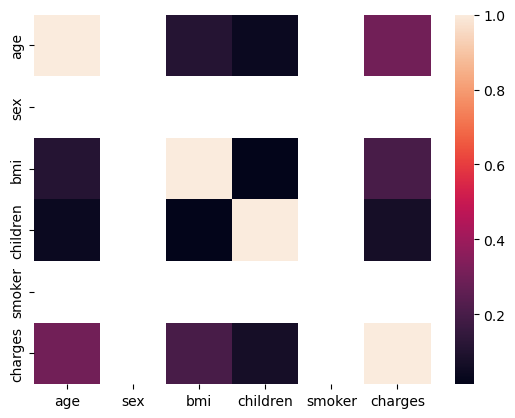

In [22]:
# Generate heatmap to visualize strong & weak correlations.
sns.heatmap(data.corr())